In [62]:
import pandas as pd
import numpy as np
import wordcloud        # ploting word cloud
import requests         # grab web-page
import pickle           # save file
from bs4 import BeautifulSoup  # parse web-page
import datetime         # format date/time
from collections import defaultdict
import re
from selenium import webdriver
import pickle                            # open our file
import os
from PIL import Image  
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS  # generate word cloud
import matplotlib.pyplot as plt
from datetime import date

In [73]:
df = pd.read_csv("Jobs_links.csv", names = ["Title","Company","URL"])
len(df)

265

In [ ]:
driver = webdriver.Chrome("./chromedriver")
hoop = []
for i in range(len(df)):
    headers = {"USer:Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36"}
    url = df["URL"][i]
    driver.get(url)
    driver.implicitly_wait(1)
    r = driver.find_element_by_id("viewJobSSRRoot")
    soup = BeautifulSoup(r.get_attribute("innerHTML"),'html.parser')
    #print(i)
    for ii in soup.find('div',{'class':'jobsearch-jobDescriptionText'}):
        try:
            hoop.append([i,''.join(ii.text.strip())])
        except AttributeError:
            hoop.append([i,''])

    

In [68]:
# create dictionary with values as lists
dct_lst= defaultdict(list)
for i in hoop:
    dct_lst[i[0]].append(i[1])
u=[]
for i in dct_lst.values(): # string join: lists of lists of strings
    u.append(''.join(i))

In [74]:
data_=pd.concat([pd.DataFrame(df),pd.DataFrame(u,columns=['Description'])],axis=1)
data_.head()

,Title,Company,URL,Description
0,Data Scientist,Aviva,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,About Aviva\n\n\nWe're the UK's leading saving...
1,Data Scientist,Lidl,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"£55,000 - £72,600* per annum - This isn’t an o..."
2,Data Scientist,Transolved,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Transolved is a data analytics and custom soft...
3,Data Scientist (Cricket),Pythia Sports,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Pythia Sports are looking for a creative think...
4,Data Scientist (Hybrid remote friendly),Imagine Communications,https://uk.indeed.com/company/Imagine-Communic...,Overview: At Imagine Communications our missio...


In [75]:
data_.to_csv("Final_Data.csv", index=False)

## Role of Final_Data starts from here

In [38]:
data_ = pd.read_csv("Final_Data.csv")

In [58]:
buzz_words=['Python','SQL','AWS', 'Machine learning','Deep learning','Text mining',
'NLP','SAS','Tableau','Sagemaker','Tensorflow','Spark', 'numpy', 'MongDB','PSQL',
"Postgres", 'Pandas', 'RESTFUL','NLP','Statistics','Algorithms','Visualization',
'GCP','Google Cloud','Naive Bayes','Random Forest','C#','Flask','CNN','MLP','RNN',
'Java','Pyspark','Postgres','MySQL','Github','Docker','Machine Learning','C+',
'C++','Pytorch','Jupyter Notebook','R Studio','R-Studio','Forecasting','Hive',
'GCP','Numpy','NoSQL','Neo4j','Neural Network','Clustering','Linear Algebra',
'Google Colab','Data Mining','Regression','Time Series','ETL','Data Wrangling',
'Web Scraping','Feature Extraction','Featuring Engineering','Scipy','ML','DL','Azure','Stream sets'
,'Confluent', 'Kafka','Hadoop','PowerBI']
buzz_words_list=[x.lower() for x in buzz_words]  # convert list to lowercase to parse

yo=[]
for i in range(len(data_)):
    a=buzz_words_list
    dd=[x for x in a if x in data_.Description[i].lower()]
    yo.append(dd)
data_['Skill_Matches']=yo
data_.head()

,Title,Company,URL,Description,Skill_Matches
0,Data Scientist,Aviva,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,About Aviva\n\n\nWe're the UK's leading saving...,"[python, sql, machine learning, numpy, pandas,..."
1,Data Scientist,Lidl,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"£55,000 - £72,600* per annum - This isn’t an o...","[python, machine learning, statistics, machine..."
2,Data Scientist,Transolved,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Transolved is a data analytics and custom soft...,"[python, sql, statistics, github, google colab..."
3,Data Scientist (Cricket),Pythia Sports,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Pythia Sports are looking for a creative think...,"[python, statistics, dl]"
4,Data Scientist (Hybrid remote friendly),Imagine Communications,https://uk.indeed.com/company/Imagine-Communic...,Overview: At Imagine Communications our missio...,"[sql, dl]"


# Combine all Skill Matches as a Data Corpus:

In [59]:
combine_all_wrd=[]
for i in data_['Skill_Matches']:
    for j in i:
#     print(type(i))
#     print(len(i))
        combine_all_wrd.append(j)

Skill_Corpus=' '.join(combine_all_wrd)

In [60]:
text = Skill_Corpus.split()
unique = []
for word in text:
    if word not in unique:
        unique.append(word)

#sort
unique.sort()

#print
print(unique)

['algebra', 'algorithms', 'aws', 'azure', 'c#', 'c+', 'c++', 'cloud', 'clustering', 'cnn', 'colab', 'data', 'deep', 'dl', 'docker', 'etl', 'extraction', 'feature', 'flask', 'forecasting', 'forest', 'gcp', 'github', 'google', 'hadoop', 'hive', 'java', 'jupyter', 'kafka', 'learning', 'linear', 'machine', 'mining', 'ml', 'mlp', 'mysql', 'neo4j', 'network', 'neural', 'nlp', 'nosql', 'notebook', 'numpy', 'pandas', 'postgres', 'powerbi', 'pyspark', 'python', 'pytorch', 'r', 'random', 'regression', 'rnn', 'sagemaker', 'sas', 'scipy', 'scraping', 'series', 'spark', 'sql', 'statistics', 'studio', 'tableau', 'tensorflow', 'text', 'time', 'visualization', 'web', 'wrangling']


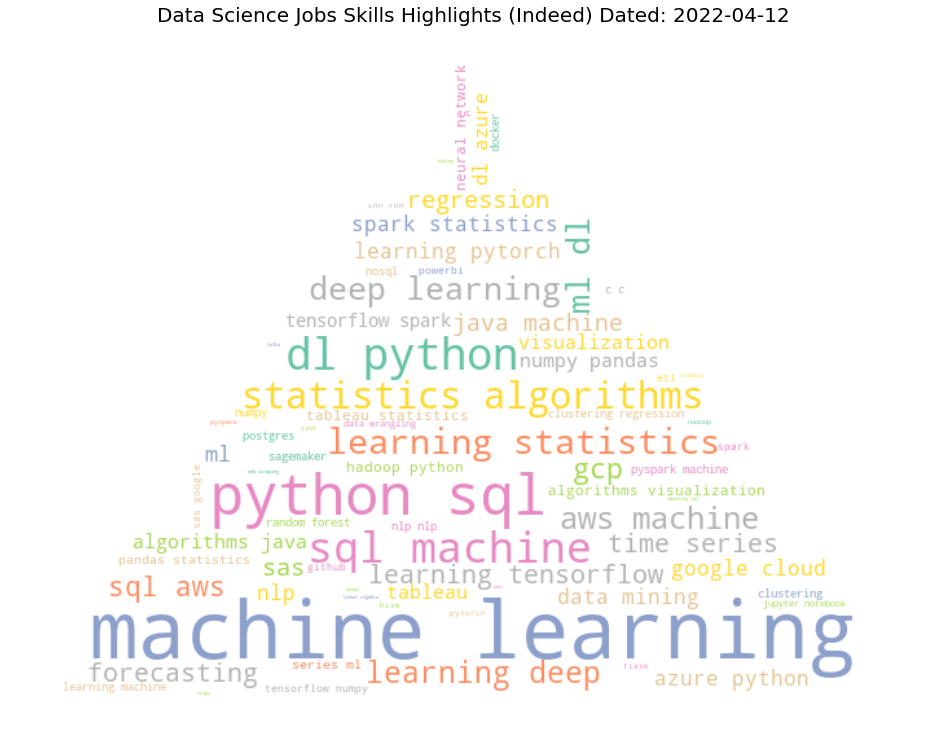

In [63]:
img_mask=np.array(Image.open('Slide1.png'))
                  
wc = WordCloud(background_color='white',max_words=len(Skill_Corpus),max_font_size=90,random_state=1,
    mask=img_mask,colormap='Set2')
wc.generate(Skill_Corpus)
plt.figure(figsize=(22,10))
plt.imshow(wc,interpolation="bilinear")
plt.title(f"Data Science Jobs Skills Highlights (Indeed) Dated: {date.today()}",fontsize=20)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()